<a href="https://colab.research.google.com/github/Animeshsinghiit/ML-preprocessing/blob/main/data_preprocessing_practise_IITM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('DataPreprocessingGraded_dataset.csv')

# New Section

In [3]:
data.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,?,?,4000.0,35.0,NEGATIVE,YES
3,?,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [4]:
data.shape

(748, 6)

In [5]:
data.describe()

,V3,V4
count,748.000000,748.000000
mean,1378.676471,34.282086
std,1459.826781,24.376714
min,250.000000,2.000000
25%,500.000000,16.000000
50%,1000.000000,28.000000
75%,1750.000000,50.000000
max,12500.000000,98.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      748 non-null    object 
 1   V2      748 non-null    object 
 2   V3      748 non-null    float64
 3   V4      748 non-null    float64
 4   V5      748 non-null    object 
 5   Target  748 non-null    object 
dtypes: float64(2), object(4)
memory usage: 35.2+ KB


In [7]:
data.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
Target    0
dtype: int64

In [8]:
print('unique values in V1 :',data.V1.unique())
print('unique values in V2 :',data.V2.unique())

unique values in V1 : ['2.0' '0.0' '?' '1.0' '4.0' '5.0' '9.0' '3.0' '12.0' '6.0' '11.0' '10.0'
 '13.0' '8.0' '14.0' '7.0' '16.0' '15.0' '23.0' '21.0' '18.0' '22.0'
 '26.0' '35.0' '38.0' '40.0' '74.0' '20.0' '17.0' '25.0' '39.0' '72.0']
unique values in V2 : ['50.0' '13.0' '?' '20.0' '24.0' '12.0' '9.0' '46.0' '3.0' '10.0' '6.0'
 '5.0' '14.0' '11.0' '8.0' '16.0' '7.0' '2.0' '19.0' '4.0' '17.0' '1.0'
 '15.0' '22.0' '18.0' '38.0' '43.0' '34.0' '44.0' '26.0' '41.0' '21.0'
 '33.0']


In [9]:
print('total no of missing values in V1: ',data.loc[data.V1=='?','V1'].count())
print('total no of missing values in V2: ',data.loc[data.V2=='?','V1'].count())

total no of missing values in V1:  5
total no of missing values in V2:  5


In [10]:
data.replace('?',np.nan,inplace=True)

In [11]:
data.V1=pd.to_numeric(data.V1)
data.V2=pd.to_numeric(data.V2)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      743 non-null    float64
 1   V2      743 non-null    float64
 2   V3      748 non-null    float64
 3   V4      748 non-null    float64
 4   V5      748 non-null    object 
 5   Target  748 non-null    object 
dtypes: float64(4), object(2)
memory usage: 35.2+ KB


In [13]:
# after replacement
print('total no of missing values in V1: ',data.loc[data.V1=='?','V1'].count())
print('total no of missing values in V2: ',data.loc[data.V2=='?','V1'].count())

total no of missing values in V1:  0
total no of missing values in V2:  0


In [14]:
from sklearn.impute import SimpleImputer

In [15]:
imputer=SimpleImputer(missing_values=np.nan,strategy='median')

In [16]:
data_numerical=data.select_dtypes(exclude='object')
data_categorical=data.select_dtypes(include='object')

In [17]:
data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      743 non-null    float64
 1   V2      743 non-null    float64
 2   V3      748 non-null    float64
 3   V4      748 non-null    float64
dtypes: float64(4)
memory usage: 23.5 KB


In [18]:
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   V5      748 non-null    object
 1   Target  748 non-null    object
dtypes: object(2)
memory usage: 11.8+ KB


In [19]:
data_numerical.var()

V1    6.550517e+01
V2    3.363720e+01
V3    2.131094e+06
V4    5.942242e+02
dtype: float64

In [20]:
import seaborn as sns

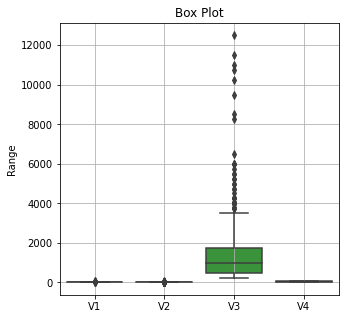

In [21]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data_numerical,)
plt.grid()
plt.title('Box Plot')
plt.ylabel('Range')
plt.show()

In [22]:
data.Target.value_counts()

NO     570
YES    178
Name: Target, dtype: int64

In [23]:
imputed_data_numerical=imputer.fit_transform(data_numerical)

In [24]:
imputed_data_numerical=pd.DataFrame(imputed_data_numerical)

In [25]:
imputed_data_numerical[0].mean()

9.552139037433156

In [26]:
from sklearn.impute import KNNImputer

In [27]:
knnimputer=KNNImputer(missing_values=np.nan,n_neighbors = 3)

In [28]:
knn_trans_data=knnimputer.fit_transform(data_numerical)

In [29]:
knn_trans_data=pd.DataFrame(knn_trans_data)

In [30]:
knn_trans_data.head()

,0,1,2,3
0,2.0,50.0,12500.0,98.0
1,0.0,13.0,3250.0,28.0
2,9.0,16.0,4000.0,35.0
3,3.0,20.0,5000.0,45.0
4,1.0,24.0,6000.0,77.0


In [31]:
knn_trans_data[0].mean()

9.532976827094473

In [32]:
imputer_mean=SimpleImputer(missing_values=np.nan,strategy='mean')

In [33]:
data_mean_simpleimputer=imputer_mean.fit_transform(data_numerical)

In [34]:
data_mean_simpleimputer=pd.DataFrame(data_mean_simpleimputer)

In [35]:
data_mean_simpleimputer.head()

,0,1,2,3
0,2.000000,50.000000,12500.0,98.0
1,0.000000,13.000000,3250.0,28.0
2,9.562584,5.464334,4000.0,35.0
3,9.562584,20.000000,5000.0,45.0
4,1.000000,24.000000,6000.0,77.0


In [36]:
data_mean_simpleimputer[1].mean()

5.464333781965007

# Pipelines and FeatureUnion part

In [37]:
data.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,NaN,NaN,4000.0,35.0,NEGATIVE,YES
3,NaN,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [38]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.compose import ColumnTransformer                                                  

In [39]:
trf1=ColumnTransformer([('imputer',SimpleImputer(missing_values=np.nan,strategy='mean'),[0,1])],remainder='passthrough')
trf2=ColumnTransformer([('scaler',StandardScaler(),[0,1,2,3])],remainder='passthrough')
trf3=ColumnTransformer([('encoder',OrdinalEncoder(),[4,5])])
pipe1=Pipeline([('num',trf1),('scale',trf2)])
final_pipe=FeatureUnion([('num',pipe1),('cat',trf3)])

In [40]:
from sklearn import set_config
set_config(display='diagram')

In [41]:
final_pipe

FeatureUnion(transformer_list=[('num',
                                Pipeline(steps=[('num',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('imputer',
                                                                                  SimpleImputer(),
                                                                                  [0,
                                                                                   1])])),
                                                ('scale',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('scaler',
                                                                                  StandardScaler(),
                                                                                  [0,
                                                                                   1,
                                                                                   2,
                                                                                   3])]))])),
                               ('cat',
                                ColumnTransformer(transformers=[('encoder',
                                                                 OrdinalEncoder(),
                                                                 [4, 5])]))])

In [42]:
final_data=final_pipe.fit_transform(data)

In [43]:
df=pd.DataFrame(final_data)

In [44]:
df.head()

,0,1,2,3,4,5,6,7
0,-0.938169,7.709867,7.623346,2.615633,NEGATIVE,YES,0.0,1.0
1,-1.186278,1.304549,1.282738,-0.257881,NEGATIVE,YES,0.0,1.0
2,0.0,-0.0,1.796842,0.029471,NEGATIVE,YES,0.0,1.0
3,0.0,2.516366,2.482313,0.439973,NEGATIVE,YES,0.0,1.0
4,-1.062223,3.208833,3.167784,1.753579,NEGATIVE,NO,0.0,0.0


In [45]:
result = pd.concat([df.iloc[:,0:4],df.iloc[:,6]], axis=1, join='inner')
target=df.iloc[:,7]
result.head()

,0,1,2,3,6
0,-0.938169,7.709867,7.623346,2.615633,0.0
1,-1.186278,1.304549,1.282738,-0.257881,0.0
2,0.0,-0.0,1.796842,0.029471,0.0
3,0.0,2.516366,2.482313,0.439973,0.0
4,-1.062223,3.208833,3.167784,1.753579,0.0


In [46]:
from sklearn.feature_selection import VarianceThreshold

In [47]:
vard=VarianceThreshold(threshold=0.1)
vart=vard.fit_transform(result)
vart

array([[-0.9381693902487627, 7.709866528281595, 7.62334626135984,
        2.6156334449690104],
       [-1.186277543640765, 1.3045494920474057, 1.2827382634817053,
        -0.257880899643511],
       [0.0, -1.53758496295156e-16, 1.7968416146610138,
        0.02947053481774113],
       ...,
       [1.6669662203672622, -0.42661727450237547, -0.4309395737826555,
        1.1378260677397136],
       [3.6518314475032807, -0.7728506278123317, -0.7736751412355277,
        0.1936713545098852],
       [7.74561597847132, -0.7728506278123317, -0.7736751412355277,
        1.5483281169700738]], dtype=object)

# code for RFE (Recursive Feature Elimination)

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [49]:
target_df=pd.to_numeric(target)

In [50]:
estimator=LogisticRegression()
rfe=RFE(estimator,n_features_to_select=2,step=1)
rfe_data=rfe.fit(result,target_df)

In [51]:
rfe_data.support_

array([ True, False,  True, False, False])

In [52]:
data.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,NaN,NaN,4000.0,35.0,NEGATIVE,YES
3,NaN,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


# Sequential Feature Selector

In [53]:
from sklearn.feature_selection import SequentialFeatureSelector

In [54]:
sfe_forward=SequentialFeatureSelector(estimator,n_features_to_select=2,direction='forward')

In [55]:
sfe_data=sfe_forward.fit(result,target_df)

In [56]:
sfe_data.support_

array([False,  True, False,  True, False])

In [57]:
sfe_backward=SequentialFeatureSelector(estimator,n_features_to_select=2,direction='backward')

In [58]:
sfe_data2=sfe_backward.fit(result,target_df)

In [59]:
sfe_data2.support_

array([False, False,  True,  True, False])